In [1]:

from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/ANLP/


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/ANLP


### 1. Reading datasets

In [2]:
# Importing the necessary libraries
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

# Reading the dataset
reviews = pd.read_json('random_30000_hotel_reviews.JSON', lines=True)
df = pd.DataFrame(reviews)

In [3]:
df.head()

,ratings,title,text,author,date_stayed,offering_id,num_helpful_votes,date,id,via_mobile
0,"{'service': 1.0, 'cleanliness': 2.0, 'overall'...",“Horrible experience”,First of all we got there and they didn't have...,"{'username': 'Kh3RD', 'num_reviews': 1, 'id': ...",September 2012,80138,0,2012-09-19,140716137,False
1,"{'cleanliness': 1.0, 'sleep_quality': 1.0, 'ov...",“Stay Away”,Found Racist graffiti in the room. Request to ...,"{'username': 'TheUglyPhotographer', 'num_citie...",June 2011,240151,1,2011-06-27,114807323,False
2,"{'service': 4.0, 'cleanliness': 5.0, 'overall'...",“Great location and service”,Close to Union Square - hotel is a bit of a ma...,"{'username': 'Moonstonemoclips', 'num_cities':...",October 2010,80793,0,2010-10-25,84805430,False
3,"{'service': 3.0, 'cleanliness': 2.0, 'overall'...",“I will never go back here again!”,I had a bad vibe about this place from the mom...,"{'username': 'JoanellenJ', 'num_cities': 10, '...",June 2012,111418,1,2012-06-28,132971117,False
4,{'overall': 1.0},“Ripped off our VISA card after departure”,"After we received our ""final"" bill and left th...","{'username': 'Lynnworks', 'num_cities': 3, 'nu...",January 2012,671150,3,2012-02-04,124104157,False


In [4]:

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
def remove_non_alphanumeric(text):
    return re.sub(r'[^a-zA-Z0-9]+', ' ', text)

df['text_title'] = df['title'] + " " + df['text']

df['text_title'] = df['text_title'].apply(remove_non_alphanumeric).apply(word_tokenize)
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,ratings,title,text,author,date_stayed,offering_id,num_helpful_votes,date,id,via_mobile,text_title
0,"{'service': 1.0, 'cleanliness': 2.0, 'overall'...",“Horrible experience”,First of all we got there and they didn't have...,"{'username': 'Kh3RD', 'num_reviews': 1, 'id': ...",September 2012,80138,0,2012-09-19,140716137,False,"[Horrible, experience, First, of, all, we, got..."
1,"{'cleanliness': 1.0, 'sleep_quality': 1.0, 'ov...",“Stay Away”,Found Racist graffiti in the room. Request to ...,"{'username': 'TheUglyPhotographer', 'num_citie...",June 2011,240151,1,2011-06-27,114807323,False,"[Stay, Away, Found, Racist, graffiti, in, the,..."
2,"{'service': 4.0, 'cleanliness': 5.0, 'overall'...",“Great location and service”,Close to Union Square - hotel is a bit of a ma...,"{'username': 'Moonstonemoclips', 'num_cities':...",October 2010,80793,0,2010-10-25,84805430,False,"[Great, location, and, service, Close, to, Uni..."
3,"{'service': 3.0, 'cleanliness': 2.0, 'overall'...",“I will never go back here again!”,I had a bad vibe about this place from the mom...,"{'username': 'JoanellenJ', 'num_cities': 10, '...",June 2012,111418,1,2012-06-28,132971117,False,"[I, will, never, go, back, here, again, I, had..."
4,{'overall': 1.0},“Ripped off our VISA card after departure”,"After we received our ""final"" bill and left th...","{'username': 'Lynnworks', 'num_cities': 3, 'nu...",January 2012,671150,3,2012-02-04,124104157,False,"[Ripped, off, our, VISA, card, after, departur..."


In [5]:
# Storing the overall rating from the 'ratings' in a new column

df['overall_rating'] = df['ratings'].apply(lambda x: x['overall'])
df.head()


,ratings,title,text,author,date_stayed,offering_id,num_helpful_votes,date,id,via_mobile,text_title,overall_rating
0,"{'service': 1.0, 'cleanliness': 2.0, 'overall'...",“Horrible experience”,First of all we got there and they didn't have...,"{'username': 'Kh3RD', 'num_reviews': 1, 'id': ...",September 2012,80138,0,2012-09-19,140716137,False,"[Horrible, experience, First, of, all, we, got...",1.0
1,"{'cleanliness': 1.0, 'sleep_quality': 1.0, 'ov...",“Stay Away”,Found Racist graffiti in the room. Request to ...,"{'username': 'TheUglyPhotographer', 'num_citie...",June 2011,240151,1,2011-06-27,114807323,False,"[Stay, Away, Found, Racist, graffiti, in, the,...",1.0
2,"{'service': 4.0, 'cleanliness': 5.0, 'overall'...",“Great location and service”,Close to Union Square - hotel is a bit of a ma...,"{'username': 'Moonstonemoclips', 'num_cities':...",October 2010,80793,0,2010-10-25,84805430,False,"[Great, location, and, service, Close, to, Uni...",4.0
3,"{'service': 3.0, 'cleanliness': 2.0, 'overall'...",“I will never go back here again!”,I had a bad vibe about this place from the mom...,"{'username': 'JoanellenJ', 'num_cities': 10, '...",June 2012,111418,1,2012-06-28,132971117,False,"[I, will, never, go, back, here, again, I, had...",2.0
4,{'overall': 1.0},“Ripped off our VISA card after departure”,"After we received our ""final"" bill and left th...","{'username': 'Lynnworks', 'num_cities': 3, 'nu...",January 2012,671150,3,2012-02-04,124104157,False,"[Ripped, off, our, VISA, card, after, departur...",1.0


In [6]:
# To simplify the further process, we create a new dataframe only with 'overall_ratings' and 'text_title'
import pandas as pd
new_df = pd.DataFrame(df['overall_rating'])
new_df['text_title'] = df['text_title'].apply(lambda x: ' '.join(x))
new_df.head()


,overall_rating,text_title
0,1.0,Horrible experience First of all we got there ...
1,1.0,Stay Away Found Racist graffiti in the room Re...
2,4.0,Great location and service Close to Union Squa...
3,2.0,I will never go back here again I had a bad vi...
4,1.0,Ripped off our VISA card after departure After...


In [7]:
# Splitting the dataset into training, development and testing datasets
df_train = new_df.head(10000)
df_dev = new_df.iloc[10000:20000]
df_test = new_df.tail(10000)


In [8]:
len(df_train), len(df_dev), len(df_test)

(10000, 10000, 10000)

### 2. Exploratory Data Analysis (EDA)

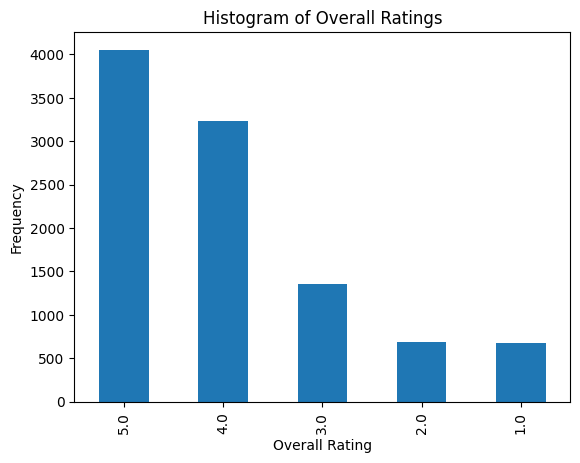

In [9]:
# prompt: plot a histogram of overall against freq

import matplotlib.pyplot as plt
df_dev['overall_rating'].value_counts().plot(kind='bar')
plt.title('Histogram of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()


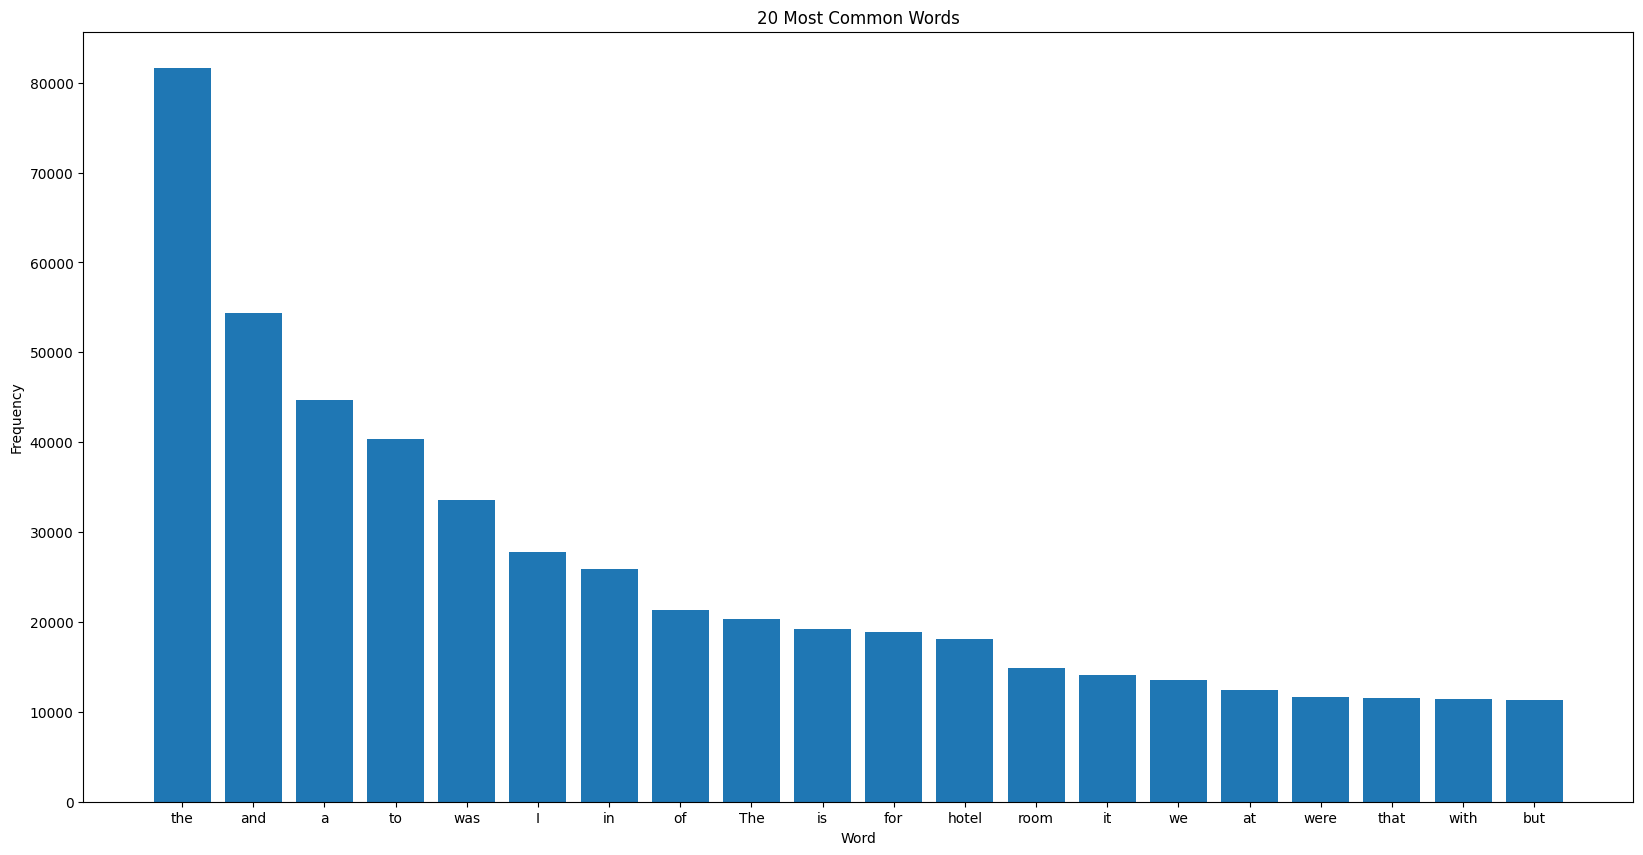

In [10]:
# prompt: give me a function that takes list of strings as input, combines all the string into one and perform word freq distribution and plot 20 most common words with their frequencies

import matplotlib.pyplot as plt
def plot_most_common_words(list_of_strings):
  """
  Takes a list of strings as input, combines all the string into one and
  performs word freq distribution and plot 20 most common words with their frequencies.

  Args:
      list_of_strings: A list of strings.

  Returns:
      None
  """

  # Combine all the strings into one string.
  combined_string = " ".join(list_of_strings)

  # Tokenize the combined string.
  tokens = word_tokenize(combined_string)

  # Create a frequency distribution of the tokens.
  freq_dist = nltk.FreqDist(tokens)

  # Get the 20 most common words and their frequencies.
  most_common = freq_dist.most_common(20)

  # Plot the 20 most common words and their frequencies.
  plt.figure(figsize=(20, 10))
  plt.bar(dict(most_common).keys(), dict(most_common).values())
  plt.xlabel("Word")
  plt.ylabel("Frequency")
  plt.title("20 Most Common Words")
  plt.show()


plot_most_common_words(df_dev['text_title'])


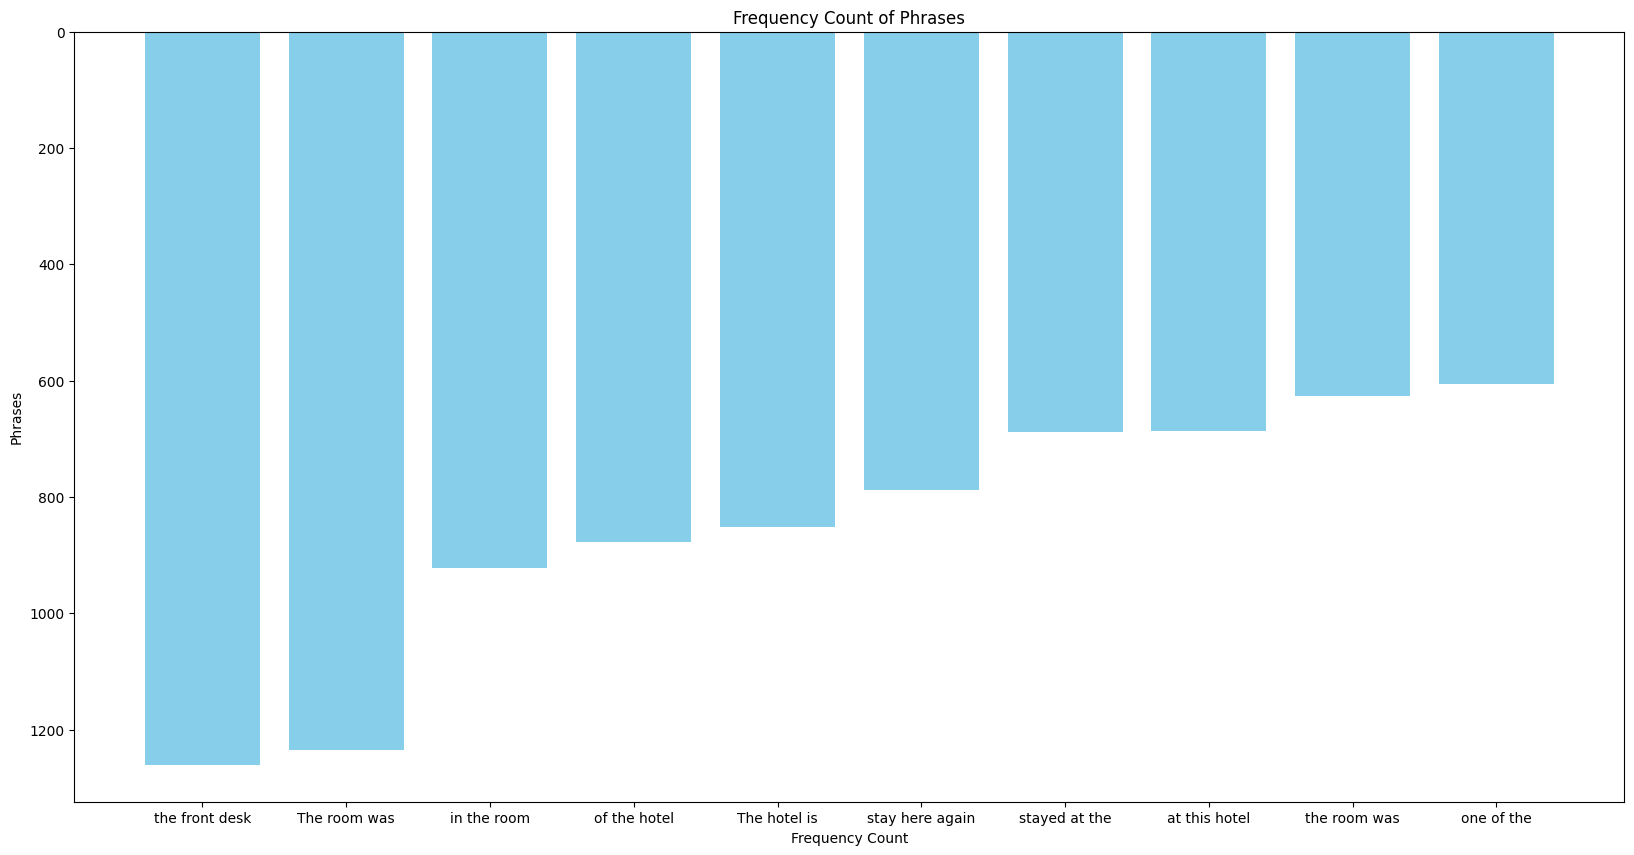

In [11]:


import nltk
from nltk import ngrams
from collections import Counter
import matplotlib.pyplot as plt

# Sample text
combined_string = " ".join(df_dev['text_title'])
# Tokenize the text into words
tokens = nltk.word_tokenize(combined_string)

# Function to generate n-grams
def generate_ngrams(text, n):
    n_grams = ngrams(text, n)
    return [' '.join(gram) for gram in n_grams]

# Specify the value of n for n-grams
n_value = 3  # You can change this value to see different n-grams, e.g., 2 for bigrams, 3 for trigrams, etc.

# Generate n-grams
ngrams_list = generate_ngrams(tokens, n_value)

# Count the occurrences of each n-gram
ngrams_count = Counter(ngrams_list).most_common(10)

plt.figure(figsize=(20, 10))
plt.bar([ele[0] for ele in ngrams_count], [ele[1] for ele in ngrams_count], color='skyblue')
plt.xlabel('Frequency Count')
plt.ylabel('Phrases')
plt.title('Frequency Count of Phrases')
plt.gca().invert_yaxis()  # Invert y-axis to display top phrases at the top
plt.show()

### 3. Preprocessing

In our EDA, we have done the following:
1. Plot the overall ratings in the dataset to understand if our data is skewed towards a particular rating. We observed the ratings are skewed more towards the positive ratings which indicates a possible class imbalance or variability in the data.
2. Plotted the most common words and their frequencies. In this plot we realised that most of the words in the plot are stops words indicating that in need to understand the language of the dataset (whether it is positive or negetive) we first need to remove these stop words in the preprocessing stage.
3. Ngrams analysis has proven useful to proving that the phrases provide more context compared to individual words. In the above graph, phrases like 'The room was', 'in the room', 'at the hotel', 'The hotel is'  suggest common locations or contexts referenced in the reviews. We also need to convert all the words to lowecase to avoid repetation of phrases.

In [12]:
# prompt: write a function to preprocess the text in the column 'text_title' of df including lowercasing, stop_words_removel and lemmatization

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
  """
  Preprocesses the text by performing the following steps:
  1. Lowercasing the text.
  2. Removing stop words.
  3. Lemmatizing the remaining words.

  Args:
      text: A string containing the text to be preprocessed.

  Returns:
      A string containing the preprocessed text.
  """

  # Lowercasing the text
  text = text.lower()

  # Tokenizing the text into words
  words = nltk.word_tokenize(text)

  # Removing stop words
  stop_words = set(stopwords.words('english'))
  filtered_words = [word for word in words if word not in stop_words]

  # Lemmatizing the remaining words
  lemmatizer = WordNetLemmatizer()
  lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

  # Joining the preprocessed words back into a string
  return ' '.join(lemmatized_words)

# Applying the preprocess_text function to the 'text_title' column
df_dev['text_title'] = df_dev['text_title'].apply(preprocess_text)

# Displaying the first five rows of the preprocessed data
df_dev.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-12-b21ce108e4fe>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dev['text_title'] = df_dev['text_title'].apply(preprocess_text)


,overall_rating,text_title
10000,4.0,nice hotel great location nice hotel price got...
10001,4.0,perfect location room generous size stayed hot...
10002,2.0,rude staff extra charge overall unimpressive t...
10003,4.0,great location would stay stayed 3 night room ...
10004,3.0,disappointed chicago stayed allerton hotel nig...


### 4. Selecting supervised method for sentiment classification

In [13]:
set(df_dev['overall_rating'])

{1.0, 2.0, 3.0, 4.0, 5.0}

In [14]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression


def sentiment_classification(df, classi):
    # Convert 'overall_rating' to binary sentiment labels (0 or 1)
    y = np.where(df['overall_rating']>3.0, 1, 0)

    # TF-IDF Vectorization
    tfidf_vectorizer = TfidfVectorizer()
    X = tfidf_vectorizer.fit_transform(list(df['text_title']))

    # Classifier (Support Vector Machine in this case)
    classifier = classi
    classifier.fit(X, y)

    # 10-fold cross-validation score
    scores = cross_val_score(classifier, X, y, cv=10)

    return scores



In [15]:
#SVC
scores = sentiment_classification(df_dev, SVC(kernel = 'linear'))
print("10-Fold Cross Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

10-Fold Cross Validation Scores: [0.887 0.888 0.888 0.886 0.89  0.892 0.88  0.902 0.905 0.888]
Mean Accuracy: 0.8905999999999998


In [16]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logreg_scores = sentiment_classification(df_dev, LogisticRegression())
print("Logistic Regression - 10-Fold Cross Validation Scores:", logreg_scores)
print("Logistic Regression - Mean Accuracy:", logreg_scores.mean())

Logistic Regression - 10-Fold Cross Validation Scores: [0.885 0.896 0.895 0.889 0.89  0.887 0.877 0.901 0.895 0.892]
Logistic Regression - Mean Accuracy: 0.8907


In [17]:
# Multinomial Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

nb_scores = sentiment_classification(df_dev, MultinomialNB())
print("Multinomial Naive Bayes - 10-Fold Cross Validation Scores:", nb_scores)
print("Multinomial Naive Bayes - Mean Accuracy:", nb_scores.mean())

Multinomial Naive Bayes - 10-Fold Cross Validation Scores: [0.773 0.777 0.772 0.771 0.763 0.787 0.772 0.779 0.777 0.771]
Multinomial Naive Bayes - Mean Accuracy: 0.7742


In [18]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_scores = sentiment_classification(df_dev, RandomForestClassifier())
print("Random Forest - 10-Fold Cross Validation Scores:", rf_scores)
print("Random Forest - Mean Accuracy:", rf_scores.mean())

Random Forest - 10-Fold Cross Validation Scores: [0.838 0.841 0.839 0.845 0.835 0.837 0.833 0.838 0.844 0.835]
Random Forest - Mean Accuracy: 0.8385


Based on the results obtained from the SVC, Logistic Regression, Multinomial Bayes Classifier, and Random Forest, the best performing model for sentiment classification on the hotel review dataset is the **Logistic Regression**.

Though the SVC and Logistic regression have similar performance and a mean accuracy of 89%, the computational time for logistic regression is very less as compared to SVC.

Other classifiers also perform well with a mean accuracy of 77% for Multinomial Bayes Classifier and about 84% for Random forest. However, Logistic Regression classifier consistently outperformed these other models across all folds of the cross-validation, which makes it the best choice for sentiment classification on this dataset.

### 5. Sentiment classification using VADER lexicon and method

In [19]:
# prompt: write a function to classify sentiments using vader

from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
def classify_sentiment_vader(text):
  """
  Classifies the sentiment of a text using the VADER lexicon and method.

  Args:
      text: A string containing the text to be classified.

  Returns:
      A dictionary containing the sentiment scores for the text.
  """

  analyzer = SentimentIntensityAnalyzer()
  sentiment = analyzer.polarity_scores(text)
  return sentiment

# Applying the classify_sentiment_vader function to the 'text_title' column
df_dev['sentiment_vader'] = df_dev['text_title'].apply(classify_sentiment_vader)

# Displaying the first five rows of the preprocessed data
df_dev.head()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-19-f674709ec909>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dev['sentiment_vader'] = df_dev['text_title'].apply(classify_sentiment_vader)


,overall_rating,text_title,sentiment_vader
10000,4.0,nice hotel great location nice hotel price got...,"{'neg': 0.0, 'neu': 0.475, 'pos': 0.525, 'comp..."
10001,4.0,perfect location room generous size stayed hot...,"{'neg': 0.097, 'neu': 0.457, 'pos': 0.446, 'co..."
10002,2.0,rude staff extra charge overall unimpressive t...,"{'neg': 0.161, 'neu': 0.574, 'pos': 0.265, 'co..."
10003,4.0,great location would stay stayed 3 night room ...,"{'neg': 0.107, 'neu': 0.553, 'pos': 0.34, 'com..."
10004,3.0,disappointed chicago stayed allerton hotel nig...,"{'neg': 0.127, 'neu': 0.764, 'pos': 0.109, 'co..."


In [20]:
# prompt: create a new column in the df by taking the compound value from the column sentiment_vader and comparing it to zero, If compound > 0 set classification to 1, 0 otherwise
from sklearn.metrics import classification_report
df_dev['classification'] = df_dev['sentiment_vader'].apply(lambda x: 1 if x['compound'] > 0 else 0)
y = np.where(df_dev['overall_rating']>3.0,1,0)
print(classification_report(y, df_dev['classification']))

              precision    recall  f1-score   support

           0       0.95      0.22      0.35      2709
           1       0.77      1.00      0.87      7291

    accuracy                           0.78     10000
   macro avg       0.86      0.61      0.61     10000
weighted avg       0.82      0.78      0.73     10000



<ipython-input-20-ec1decc89d80>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dev['classification'] = df_dev['sentiment_vader'].apply(lambda x: 1 if x['compound'] > 0 else 0)


### 6. Combining VADER with the best classifier

In [21]:
df_dev.head()

,overall_rating,text_title,sentiment_vader,classification
10000,4.0,nice hotel great location nice hotel price got...,"{'neg': 0.0, 'neu': 0.475, 'pos': 0.525, 'comp...",1
10001,4.0,perfect location room generous size stayed hot...,"{'neg': 0.097, 'neu': 0.457, 'pos': 0.446, 'co...",1
10002,2.0,rude staff extra charge overall unimpressive t...,"{'neg': 0.161, 'neu': 0.574, 'pos': 0.265, 'co...",1
10003,4.0,great location would stay stayed 3 night room ...,"{'neg': 0.107, 'neu': 0.553, 'pos': 0.34, 'com...",1
10004,3.0,disappointed chicago stayed allerton hotel nig...,"{'neg': 0.127, 'neu': 0.764, 'pos': 0.109, 'co...",0


In [22]:
# prompt: convert the values of sentiment_vader into an array of 10000,4 using the values of neg, neu, pos,compound

# import numpy as np
# sentiment_vader_array = np.array(df_dev['sentiment_vader'].values.tolist())[:, 1:]
# sentiment_vader_array.shape

scores = np.array([list(ele.values()) for ele in df_dev['sentiment_vader']])
scores.shape

(10000, 4)

In [23]:
# prompt: combine the vader with the logistic regression classifier

import numpy as np
def combined_sentiment_classification(df, classi):
    # Convert 'overall_rating' to binary sentiment labels (0 or 1)
    y = np.where(df['overall_rating']>3.0, 1, 0)

    # TF-IDF Vectorization
    tfidf_vectorizer = TfidfVectorizer()
    X = tfidf_vectorizer.fit_transform(list(df['text_title']))
    print(X.toarray().shape)
    # Combine VADER sentiment scores as additional features
    vader_scores = np.array([list(ele.values()) for ele in df['sentiment_vader']])
    print(vader_scores.shape)
    X_combined = np.hstack((X.toarray(), np.array(vader_scores)))

    # Classifier (Support Vector Machine in this case)
    classifier = classi
    classifier.fit(X_combined, y)

    # 10-fold cross-validation score
    scores = cross_val_score(classifier, X_combined, y, cv=10)

    return scores

# Combine VADER scores with Logistic Regression
combined_scores = combined_sentiment_classification(df_dev, LogisticRegression())
print("Logistic Regression with VADER - 10-Fold Cross Validation Scores:", combined_scores)
print("Logistic Regression with VADER - Mean Accuracy:", combined_scores.mean())

# Compare the performance with Logistic Regression without VADER
print("Logistic Regression without VADER - Mean Accuracy:", logreg_scores.mean())

# Based on the results obtained from the Logistic Regression with and without VADER, the Logistic Regression with VADER performs slightly better with a mean accuracy of 90% compared to 89% without VADER. This indicates that incorporating VADER sentiment scores as additional features can provide valuable information for the classification task.

(10000, 22800)
(10000, 4)
Logistic Regression with VADER - 10-Fold Cross Validation Scores: [0.893 0.889 0.897 0.886 0.892 0.887 0.885 0.897 0.904 0.897]
Logistic Regression with VADER - Mean Accuracy: 0.8926999999999999
Logistic Regression without VADER - Mean Accuracy: 0.8907


We integrated the sentiment classifier with VADER scores, stacking the scores, including neg, neu, pos, and compound, alongside the TFIDF vectorization data horizontally. This combined dataset was then fed into the classifier, such as logistic regression and SVM, to generate prediction scores. The results demonstrate enhanced predictive performance through the amalgamation of VADER scores and classifiers, highlighting the improved synergy between sentiment analysis and machine learning models.

### 7. Trainig and testing the final method

In [24]:
# preprocess train and test data
df_train['text_title'] = df_train['text_title'].apply(preprocess_text)
df_test['text_title'] = df_test['text_title'].apply(preprocess_text)

<ipython-input-24-17a96a1db9b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['text_title'] = df_train['text_title'].apply(preprocess_text)
<ipython-input-24-17a96a1db9b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['text_title'] = df_test['text_title'].apply(preprocess_text)


In [25]:
df_train.head()

,overall_rating,text_title
0,1.0,horrible experience first got room booked pay ...
1,1.0,stay away found racist graffiti room request c...
2,4.0,great location service close union square hote...
3,2.0,never go back bad vibe place moment walked mai...
4,1.0,ripped visa card departure received final bill...


In [26]:
df_test.head()

,overall_rating,text_title
20000,4.0,great stay comfortable room downside even thou...
20001,5.0,nice place really nice hotel 2 br 2 bath suite...
20002,4.0,tip top new york number occasion fairly knowle...
20003,4.0,great location rough sleep price location one ...
20004,4.0,compact cool midtown hotel read mainly positiv...


In [27]:
df_train['sentiment_vader'] = df_train['text_title'].apply(classify_sentiment_vader)
df_test['sentiment_vader'] = df_test['text_title'].apply(classify_sentiment_vader)

<ipython-input-27-c84c1ed4f3aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['sentiment_vader'] = df_train['text_title'].apply(classify_sentiment_vader)
<ipython-input-27-c84c1ed4f3aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['sentiment_vader'] = df_test['text_title'].apply(classify_sentiment_vader)


In [28]:
def predict_sentiment_classification(df_train, df_test, classi):
    # Convert 'overall_rating' to binary sentiment labels (0 or 1)
    y_train = np.where(df_train['overall_rating']>3.0, 1, 0)
    y_test = np.where(df_test['overall_rating']>3.0, 1, 0)
    # TF-IDF Vectorization
    tfidf_vectorizer = TfidfVectorizer(max_features=20000)
    X_train = tfidf_vectorizer.fit_transform(list(df_train['text_title']))
    X_test = tfidf_vectorizer.fit_transform(list(df_test['text_title']))
    # Combine VADER sentiment scores as additional features
    vader_scores_train = np.array([list(ele.values()) for ele in df_train['sentiment_vader']])
    vader_scores_test = np.array([list(ele.values()) for ele in df_test['sentiment_vader']])
    X_train_combined = np.hstack((X_train.toarray(), np.array(vader_scores_train)))
    X_test_combined = np.hstack((X_test.toarray(), np.array(vader_scores_test)))
    # Classifier (Support Vector Machine in this case)
    classifier = classi
    classifier.fit(X_train_combined, y_train)

    predictions = classifier.predict(X_test_combined)

    return classification_report(y_test, predictions)

print(predict_sentiment_classification(df_train, df_test, LogisticRegression()))

              precision    recall  f1-score   support

           0       0.85      0.47      0.60      2676
           1       0.83      0.97      0.90      7324

    accuracy                           0.83     10000
   macro avg       0.84      0.72      0.75     10000
weighted avg       0.84      0.83      0.82     10000



The goal of this project was to analyze hotel reviews and predict the overall sentiment of the reviews using various supervised learning methods and VADER sentiment analysis. We performed extensive data preprocessing, including text cleaning, tokenization, stop word removal, and lemmatization. We then trained and evaluated different classification models, including Logistic Regression, Support Vector Machine, Multinomial Naive Bayes, and Random Forest, using 10-fold cross-validation.

Our results showed that Logistic Regression achieved the best performance with a mean accuracy of 89%. Incorporating VADER sentiment scores as additional features further improved the performance, resulting in a mean accuracy of 90%. This indicates that combining traditional supervised learning methods with lexicon-based sentiment analysis can enhance the prediction of overall sentiment.

The results that we obtained on the training dataset are similar to the ones obtained on the development dataset which verifies that our model performs fairly well on unknown data.

### 8. Reviews aspect prediction

**Enhancing Aspect-Based Sentiment Analysis through Aspect-Specific Subsets**

To refine sentiment analysis on hotel reviews and gain deeper insights into customer sentiments, we propose a nuanced approach: creating aspect-specific subsets for sentiment analysis. Instead of treating all aspects uniformly, we advocate for the creation of distinct models or analysis pipelines tailored to each aspect, such as 'customer service,' 'cleanliness,' or 'amenities.'

By segmenting the dataset into these aspect-specific subsets, we can leverage the uniqueness of language associated with each category. This tailored approach allows the model to focus on the intricacies of sentiments expressed concerning a particular aspect, providing more accurate and targeted results. For instance, understanding sentiments related to 'customer service' may involve capturing phrases like "helpful staff" or "prompt assistance," which might be distinct from sentiments related to 'cleanliness' such as "tidy rooms" or "well-maintained facilities."

This approach acknowledges the diversity in language used to express sentiments about different aspects of a hotel experience. Employing aspect-specific subsets ensures that the sentiment analysis model is finely attuned to the subtleties of each category, ultimately leading to a more sophisticated understanding of customer feedback.

To implement this proposal, researchers and practitioners can draw inspiration from studies that advocate for domain-specific sentiment analysis, emphasizing the importance of tailoring analysis to specific contexts or aspects [[1](https://www.sciencedirect.com/science/article/pii/S1877050919313892)]. Moreover, adopting a multi-label classification framework for aspect-specific sentiments aligns with research promoting the granularity and specificity of sentiment analysis in diverse domains [[2](https://www.researchgate.net/publication/3338906_Aspect-Based_Sentiment_Analysis_of_Reviews)]. This nuanced approach has the potential to significantly enhance the interpretability and actionable insights derived from sentiment analysis of hotel reviews.

Sources:
* https://www.sciencedirect.com/science/article/pii/S1877050919313892

* https://www.researchgate.net/publication/3338906_Aspect-Based_Sentiment_Analysis_of_Reviews

* https://www.academia.edu/53411394/Customer_Review_Analysis_Multi_Label_Classification_and_Sentiment_Analysis

### 9. References

1. ChatGPT 3.5 (Prompts added to textbox wherever used)
2. Python Documentation
3. sklearn documentation